In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
import warnings


sns.set_style("whitegrid")
sns.set_palette('rocket')
plt.rcParams['image.cmap'] = 'rocket'

warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv('datasets/cleaned/merged_fx_dataset.csv')
df.head()

,Date,Buying,Selling,MidRate,MPR,FoodInflation,GhInflationRate,NonFoodInflation,BrentOil,Cocoa,...,GhCompositeIndex,FXDeposits,InterbankWeightedAvg,T-bill-182,T-bill-91,PrivateSectorCredit,TradeBalance,USGDP,USInflationRate,USInterestRate
0,2022-12-01,13.0973,13.1105,13.1039,27.0,59.7,54.1,49.9,81.34,2538.57,...,0.00,45124.35,25.51,36.23,35.48,63753.45,450.75,22249.459,116.977,3.83
1,2022-11-30,13.0978,13.1110,13.1044,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
2,2022-11-29,13.0980,13.1112,13.1046,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
3,2022-11-28,13.0982,13.1114,13.1048,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
4,2022-11-25,13.0985,13.1117,13.1051,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83


In [171]:
df.columns

Index(['Date', 'Buying', 'Selling', 'MidRate', 'MPR', 'FoodInflation',
       'GhInflationRate', 'NonFoodInflation', 'BrentOil', 'Cocoa', 'Gold',
       'GhInterestRate', 'NetForeignAssets', 'NIR', 'Imports', 'Exports',
       'GhGDP', 'GhCompositeIndex', 'FXDeposits', 'InterbankWeightedAvg',
       'T-bill-182', 'T-bill-91', 'PrivateSectorCredit', 'TradeBalance',
       'USGDP', 'USInflationRate', 'USInterestRate'],
      dtype='object')

In [172]:
df.drop(columns=['MPR', 'InterbankWeightedAvg',
        'NonFoodInflation', 'FoodInflation', 'MidRate', 'Selling', 'T-bill-182', 'Imports', 'Exports'], inplace=True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 3703 non-null   object 
 1   Buying               3703 non-null   float64
 2   GhInflationRate      3703 non-null   float64
 3   BrentOil             3703 non-null   float64
 4   Cocoa                3703 non-null   float64
 5   Gold                 3703 non-null   float64
 6   GhInterestRate       3703 non-null   float64
 7   NetForeignAssets     3703 non-null   float64
 8   NIR                  3703 non-null   float64
 9   GhGDP                3703 non-null   float64
 10  GhCompositeIndex     3703 non-null   float64
 11  FXDeposits           3703 non-null   float64
 12  T-bill-91            3703 non-null   float64
 13  PrivateSectorCredit  3703 non-null   float64
 14  TradeBalance         3703 non-null   float64
 15  USGDP                3703 non-null   f

In [174]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3703 non-null   datetime64[ns]
 1   Buying               3703 non-null   float64       
 2   GhInflationRate      3703 non-null   float64       
 3   BrentOil             3703 non-null   float64       
 4   Cocoa                3703 non-null   float64       
 5   Gold                 3703 non-null   float64       
 6   GhInterestRate       3703 non-null   float64       
 7   NetForeignAssets     3703 non-null   float64       
 8   NIR                  3703 non-null   float64       
 9   GhGDP                3703 non-null   float64       
 10  GhCompositeIndex     3703 non-null   float64       
 11  FXDeposits           3703 non-null   float64       
 12  T-bill-91            3703 non-null   float64       
 13  PrivateSectorCredit  3703 non-nul

In [175]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3703,2015-06-16 19:20:47.312989440,2008-01-02 00:00:00,2011-09-21 00:00:00,2015-06-17 00:00:00,2019-03-12 12:00:00,2022-12-01 00:00:00,NaN
Buying,3703.0,3.530772,0.0,1.5066,3.7796,5.0828,13.0991,2.075334
GhInflationRate,3703.0,13.162123,4.67,8.64,11.41,16.91,54.1,6.548326
BrentOil,3703.0,78.275919,26.6257,56.0,74.8,105.81,134.8,26.067664
Cocoa,3703.0,2605.203195,1904.6,2324.8182,2555.86,2897.6,3430.4,364.24095
Gold,3703.0,1376.505611,760.8,1200.7,1305.8,1658.5,1971.0695,293.762486
GhInterestRate,3703.0,17.680631,6.35,13.57,16.842,22.1,25.8,4.783107
NetForeignAssets,3703.0,2605.340835,-2167.127029,1977.552321,2654.5,3484.78,5521.651498,1274.261697
NIR,3703.0,3494.064038,674.6,2390.6,3228.1,4321.4,8231.125878,1676.918646
GhGDP,3703.0,33150.237007,17762.60476,26471.60003,32668.2724,39670.80386,48793.5,7946.982696


In [176]:
df['Buying'] = df['Buying'].replace(0, np.nan)
df['Buying'] = df['Buying'].interpolate()

In [177]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3703,2015-06-16 19:20:47.312989440,2008-01-02 00:00:00,2011-09-21 00:00:00,2015-06-17 00:00:00,2019-03-12 12:00:00,2022-12-01 00:00:00,NaN
Buying,3703.0,3.534003,0.9543,1.5133,3.7796,5.0828,13.0991,2.070943
GhInflationRate,3703.0,13.162123,4.67,8.64,11.41,16.91,54.1,6.548326
BrentOil,3703.0,78.275919,26.6257,56.0,74.8,105.81,134.8,26.067664
Cocoa,3703.0,2605.203195,1904.6,2324.8182,2555.86,2897.6,3430.4,364.24095
Gold,3703.0,1376.505611,760.8,1200.7,1305.8,1658.5,1971.0695,293.762486
GhInterestRate,3703.0,17.680631,6.35,13.57,16.842,22.1,25.8,4.783107
NetForeignAssets,3703.0,2605.340835,-2167.127029,1977.552321,2654.5,3484.78,5521.651498,1274.261697
NIR,3703.0,3494.064038,674.6,2390.6,3228.1,4321.4,8231.125878,1676.918646
GhGDP,3703.0,33150.237007,17762.60476,26471.60003,32668.2724,39670.80386,48793.5,7946.982696


In [178]:
# df.set_index('Date', inplace=True)

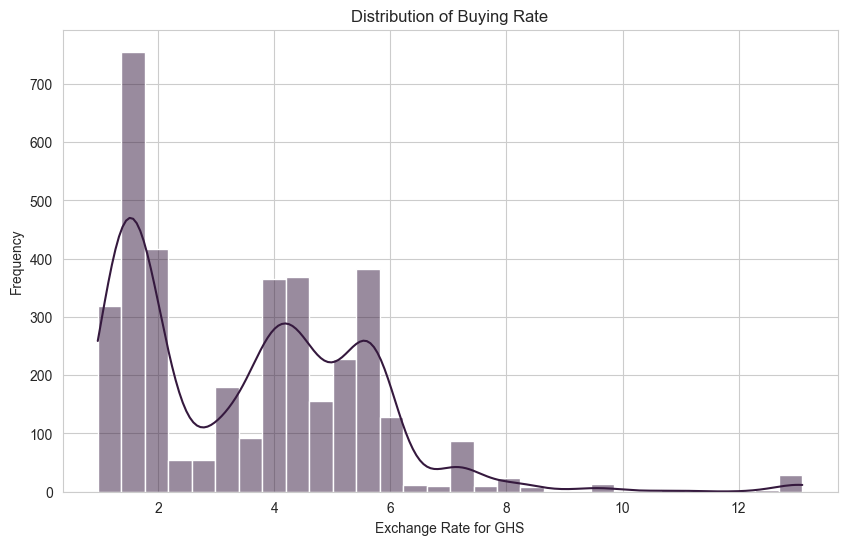

In [179]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Buying'], kde=True, bins=30)
# plt.gca().xaxis.set_major_formatter(
#     ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))
plt.title("Distribution of Buying Rate")
plt.xlabel("Exchange Rate for GHS")
plt.ylabel("Frequency")
plt.savefig('distribution.png', transparent=True)
plt.show()

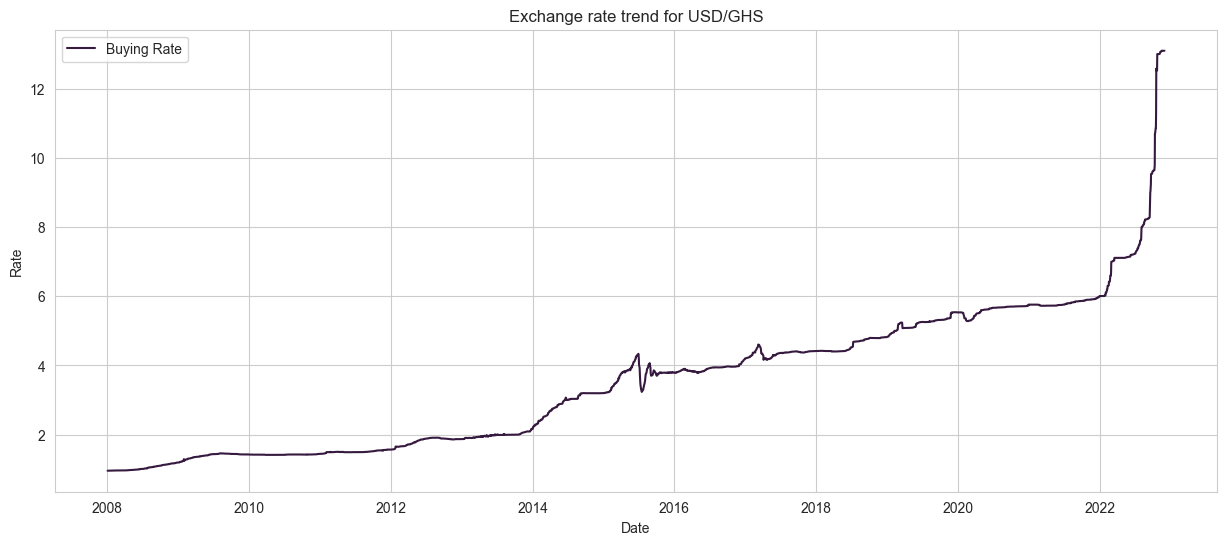

In [180]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Buying'], label='Buying Rate')
plt.title("Exchange rate trend for USD/GHS")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.savefig('plots/usd_buying_trend.png', transparent=True)
plt.show()

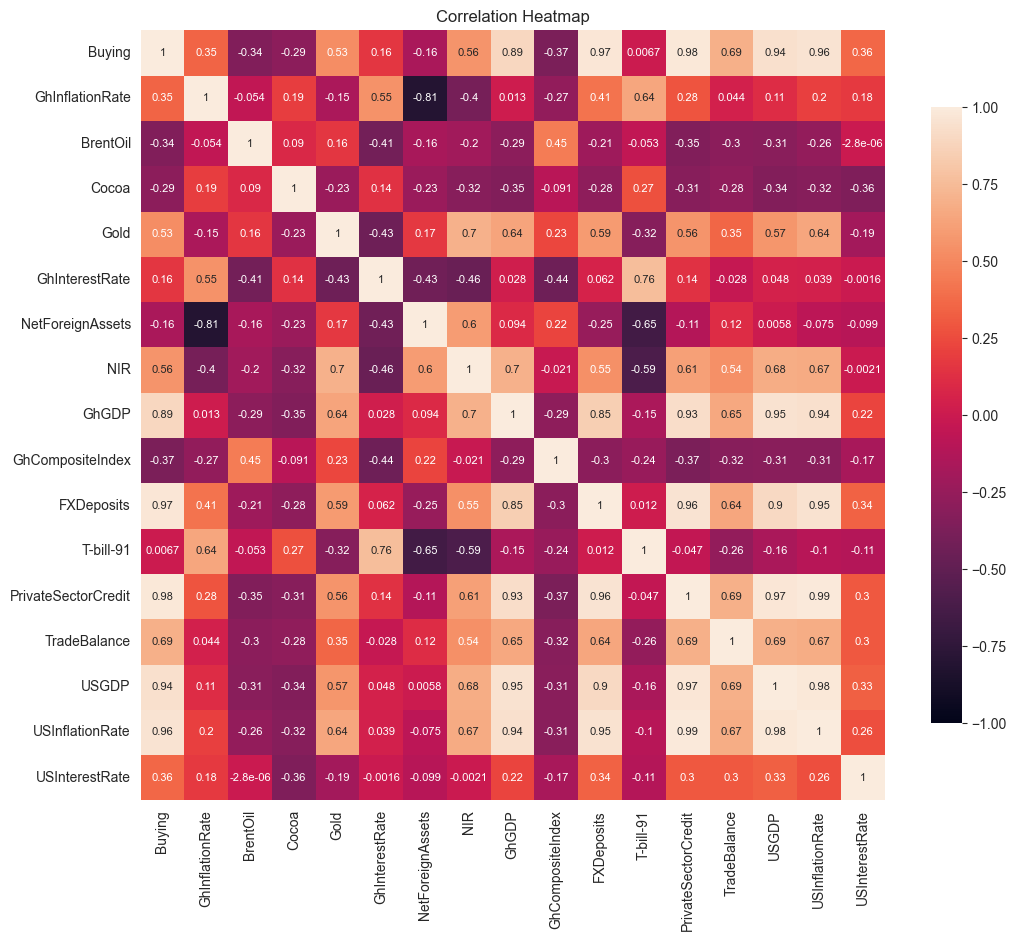

In [181]:
correlation_matrix = df.drop(columns=['Date']).copy().corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cbar_kws={'shrink': .8}, annot_kws={'size': 8})
plt.title("Correlation Heatmap")
plt.savefig('plots/exchange_rate_correlation.png', transparent=True)
plt.show()

In [182]:
# Sort correlation values from highest to lowest (flatten matrix, exclude self-correlation)
sorted_corr = correlation_matrix['Buying'].sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr < 1]  # Remove self-correlation pairs
sorted_corr

PrivateSectorCredit    0.983942
FXDeposits             0.972815
USInflationRate        0.960247
USGDP                  0.938172
GhGDP                  0.894269
TradeBalance           0.687899
NIR                    0.556238
Gold                   0.528760
USInterestRate         0.359582
GhInflationRate        0.349047
GhInterestRate         0.161116
T-bill-91              0.006745
NetForeignAssets      -0.160730
Cocoa                 -0.291506
BrentOil              -0.343923
GhCompositeIndex      -0.372779
Name: Buying, dtype: float64

In [183]:
FEATURES = df.drop(columns=['Buying']).columns.tolist()

In [184]:
FEATURES

['Date',
 'GhInflationRate',
 'BrentOil',
 'Cocoa',
 'Gold',
 'GhInterestRate',
 'NetForeignAssets',
 'NIR',
 'GhGDP',
 'GhCompositeIndex',
 'FXDeposits',
 'T-bill-91',
 'PrivateSectorCredit',
 'TradeBalance',
 'USGDP',
 'USInflationRate',
 'USInterestRate']

In [185]:
TARGET = 'Buying'

In [186]:
LAGS = [5, 20, 60]

In [187]:
for lag in LAGS:
    column_name = f'{TARGET}Lag{lag}d'
    df[column_name] = df[TARGET].shift(lag)
    FEATURES.append(column_name)

In [188]:
# Interest Rate Parity (IRP)
df['InterestRateDifferential'] = df['GhInterestRate'] - df['USInterestRate']
FEATURES.append('InterestRateDifferential')

# Purchasing Power Parity (PPP)
df['InflationDifferential'] = df['GhInflationRate'] - df['USInflationRate']
FEATURES.append('InflationDifferential')

In [189]:
# D. Growth Rates for Low-Frequency Data (Economic Momentum)
# Use 65-day shift as a proxy for Quarter-over-Quarter (QoQ) Growth
QUARTERLY_SHIFT = 65
df['GhGDPQoQGrowth'] = (
    df['GhGDP'] / df['GhGDP'].shift(QUARTERLY_SHIFT) - 1) * 100
df['USGDPQoQGrowth'] = (
    df['USGDP'] / df['USGDP'].shift(QUARTERLY_SHIFT) - 1) * 100
FEATURES.extend(['GhGDPQoQGrowth', 'USGDPQoQGrowth'])

In [190]:
final_features = [TARGET] + FEATURES

In [191]:
df.dropna(subset=[TARGET] + FEATURES, inplace=True)

In [201]:
df.drop(columns=['Date'])

,Buying,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,GhGDP,GhCompositeIndex,...,BuyingLag5d,BuyingLag20d,BuyingLag60d,InterestRateDifferential,InflationDifferential,GhGDPQoQGrowth,USGDPQoQGrowth,WeekOfYear,Month,Quarter
65,8.2284,33.91,97.74,2385.96,1763.71,21.9275,-1552.253076,2701.494589,44155.50000,-1.12,...,8.2424,9.5537,13.0987,19.5975,-81.388,-9.505364,-0.821031,35,8,3
66,8.2234,33.91,97.74,2385.96,1763.71,21.9275,-1552.253076,2701.494589,44155.50000,-1.12,...,8.2374,9.5435,13.0989,19.5975,-81.388,-9.505364,-0.821031,35,8,3
67,8.2224,33.91,97.74,2385.96,1763.71,21.9275,-1552.253076,2701.494589,44155.50000,-1.12,...,8.2344,9.5385,13.0986,19.5975,-81.388,-9.505364,-0.821031,35,8,3
68,8.2214,33.91,97.74,2385.96,1763.71,21.9275,-1552.253076,2701.494589,44155.50000,-1.12,...,8.2294,9.5365,13.0988,19.5975,-81.388,-9.505364,-0.821031,34,8,3
69,8.2209,33.91,97.74,2385.96,1763.71,21.9275,-1552.253076,2701.494589,44155.50000,-1.12,...,8.2284,9.5366,13.0990,19.5975,-81.388,-9.505364,-0.821031,34,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,0.9576,12.81,91.90,2174.50,891.00,12.1750,1979.350000,1674.300000,18863.43405,25.89,...,0.9574,0.9590,0.9645,7.9050,-74.283,6.197454,-0.591904,2,1,1
3699,0.9551,12.81,91.90,2174.50,891.00,12.1750,1979.350000,1674.300000,18863.43405,25.89,...,0.9574,0.9579,0.9643,7.9050,-74.283,6.197454,-0.591904,2,1,1
3700,0.9543,12.81,91.90,2174.50,891.00,12.1750,1979.350000,1674.300000,18863.43405,25.89,...,0.9574,0.9579,0.9643,7.9950,-74.283,6.197454,-0.591904,1,1,1
3701,0.9545,12.81,91.90,2174.50,891.00,12.1750,1979.350000,1674.300000,18863.43405,25.89,...,0.9574,0.9579,0.9643,7.9250,-74.283,6.197454,-0.591904,1,1,1


In [192]:
x = df[final_features]
y = df[TARGET]

print(
    f"Data ready. Total features: {len(final_features)}, Cleaned data shape: {x.shape}")

Data ready. Total features: 25, Cleaned data shape: (3638, 25)


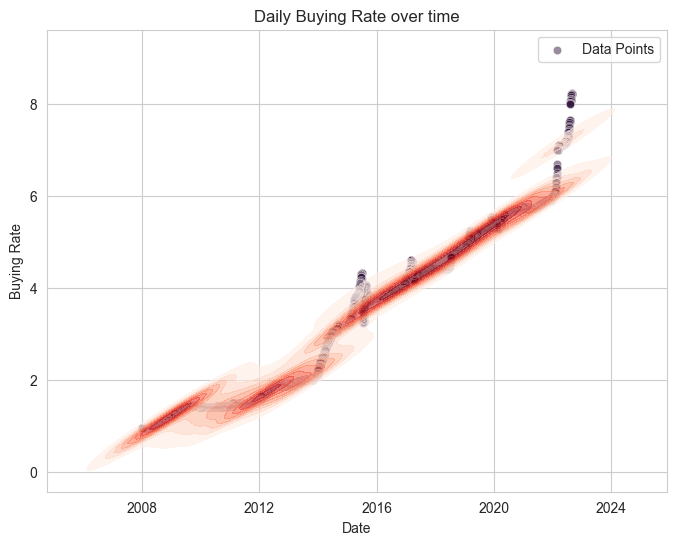

In [193]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Date'], y=df['Buying'],
                alpha=0.5, label='Data Points')
sns.kdeplot(x=df['Date'], y=df['Buying'], cmap='Reds',
            fill=True, alpha=0.6, label='Density')
plt.title('Daily Buying Rate over time')
plt.xlabel('Date')
plt.ylabel('Buying Rate')
plt.legend()
# plt.savefig('store_vs_weekly_sales.png', transparent=True)
plt.show()

In [194]:
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [195]:
target = 'Buying'

In [196]:
# y = df[[target]]
# x = df.drop(columns=['Buying', 'Date'])

In [197]:
x.shape, y.shape

((3638, 25), (3638,))

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [204]:
# Min-Max Scaling for features and target
scaler_x = MinMaxScaler()
x_train_scaled = scaler_x.fit_transform(x_train.values)
x_test_scaled = scaler_x.transform(x_test.values)

scaler_y = MinMaxScaler()
# Remove 'Date' column if it exists, as it cannot be scaled
# y_train_no_date = y_train.drop(columns=['Date'], errors='ignore')
y_train_scaled = scaler_y.fit_transform(y_train.values)
# Remove 'Date' column if it exists, to match scaling as done for y_train
# y_test_no_date = y_test.drop(columns=['Date'], errors='ignore')
y_test_scaled = scaler_y.transform(y_test.values)

# Convert to DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Display the first few rows
print(x_train_scaled_df.head())

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
def create_sequences(x, y, time_steps=4):
    xs, ys = [], []
    for i in range(len(x) - time_steps):
        xs.append(x[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(xs), np.array(ys)


time_steps = 4
x_train_seq, y_train_seq = create_sequences(
    x_train_scaled, y_train_scaled, time_steps)
x_test_seq, y_test_seq = create_sequences(
    x_test_scaled, y_test_scaled, time_steps)

In [ ]:
# Define the RNN model with default LSTM settings
model = Sequential([
    # Default activations
    LSTM(64, input_shape=(time_steps,
         x_train_seq.shape[2]), return_sequences=True),
    LSTM(32),  # Default activations
    Dense(1)  # Output layer
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [ ]:
# Train the model
history = model.fit(
    x_train_seq, y_train_seq,
    validation_data=(x_test_seq, y_test_seq),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0454 - val_loss: 7.1297e-04 - val_mean_absolute_error: 0.0197
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2407e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0019 - val_mean_absolute_error: 0.0391
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5717e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0017 - val_mean_absolute_error: 0.0379
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7203e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0019 - val_mean_absolute_error: 0.0395
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0849e-04 - mean_absolute_error: 0.0134 - val_loss: 0.0016 - val_mean_absolute_error: 0.0348
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8654e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0020 - val_mean_absolute_error: 0.0392
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5644e-04 - mean_absolute_er

In [ ]:
# Predict on test data
from sklearn.metrics import root_mean_squared_error


y_pred_scaled = model.predict(x_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Rescale the test target to original scale
y_test_actual = scaler_y.inverse_transform(y_test_seq)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_actual.flatten(), y_pred.flatten())
mse = mean_squared_error(y_test_actual.flatten(), y_pred.flatten())
rmse = root_mean_squared_error(y_test_actual, y_pred)


print(f"\n=====Evaluation Metrics=====")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

=====Evaluation Metrics=====
Mean Absolute Error (MAE): 0.39518158791773683
Root Mean Squared Error (RMSE): 0.47845033574365614


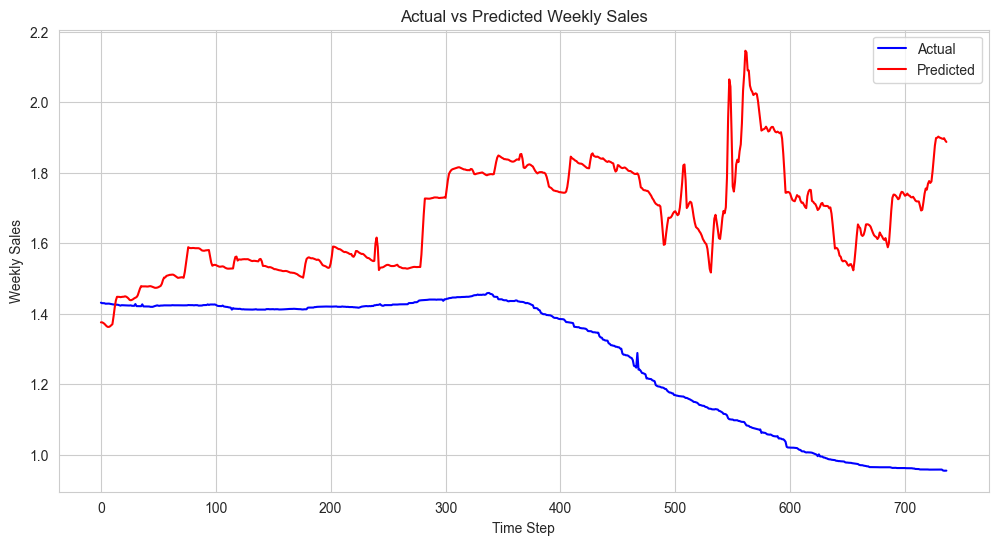

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual.flatten(), label='Actual', color='blue')
plt.plot(y_pred.flatten(), label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Time Step')
plt.ylabel('Weekly Sales')
plt.savefig('Predicted_Sales.png', transparent=True)
plt.show()

In [ ]:
# Define a function to create the model
def build_model(hp):
    model = Sequential()

    # Tune the number of LSTM units in the first LSTM layer
    model.add(LSTM(
        hp.Int('units_1', min_value=32, max_value=128,
               step=32),  # Hyperparameter to tune
        input_shape=(time_steps, x_train_seq.shape[2]),
        return_sequences=True
    ))

    # Add second LSTM layer
    model.add(LSTM(
        hp.Int('units_2', min_value=16, max_value=64,
               step=16)  # Hyperparameter to tune
    ))

    # Add Dropout layer to prevent overfitting
    model.add(
        Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Tune the learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate',
                       min_value=1e-5, max_value=1e-2, sampling='log')),
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )

    return model

In [ ]:
# Define the tuner using Random Search
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',  # We want to minimize validation loss
    max_trials=10,  # Number of different combinations to try
    executions_per_trial=1,  # Number of trials to run for each combination
    directory='my_dir',  # Directory to save the results
    project_name='LSTM_tuning'
)

In [ ]:
# Start the hyperparameter search
tuner.search(
    x_train_seq, y_train_seq,  # Training data
    epochs=50,  # Number of epochs to train each model for
    batch_size=32,  # Batch size
    validation_data=(x_test_seq, y_test_seq)  # Validation data
)

Trial 10 Complete [00h 00m 27s]
val_loss: 0.00023752760898787528

Best val_loss So Far: 8.996239193947986e-05
Total elapsed time: 00h 04m 37s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

Best hyperparameters: {'units_1': 64, 'units_2': 48, 'dropout_rate': 0.4, 'learning_rate': 1.6455228885616634e-05}


In [ ]:
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

# Train the final model
history = model.fit(
    x_train_seq, y_train_seq,
    validation_data=(x_test_seq, y_test_seq),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.1194 - val_loss: 0.0150 - val_mean_absolute_error: 0.1206
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0994 - val_loss: 0.0157 - val_mean_absolute_error: 0.1235
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0900 - val_loss: 0.0121 - val_mean_absolute_error: 0.1082
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0784 - val_loss: 0.0082 - val_mean_absolute_error: 0.0889
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0687 - val_loss: 0.0052 - val_mean_absolute_error: 0.0699
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0608 - val_loss: 0.0030 - val_mean_absolute_error: 0.0527
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0546 - val_loss: 0.001

In [ ]:
# Predict on test data
y_pred_scaled = model.predict(x_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Rescale the test target to original scale
y_test_actual = scaler_y.inverse_transform(y_test_seq)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_actual.flatten(), y_pred.flatten())
mse = mean_squared_error(y_test_actual.flatten(), y_pred.flatten())
rmse = root_mean_squared_error(y_test_actual.flatten(), y_pred.flatten())

print(f"\n=====Evaluation Metrics=====")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 

=====Evaluation Metrics=====
Mean Absolute Error (MAE): 0.16346731154676045
Root Mean Squared Error (RMSE): 0.1891292392204734


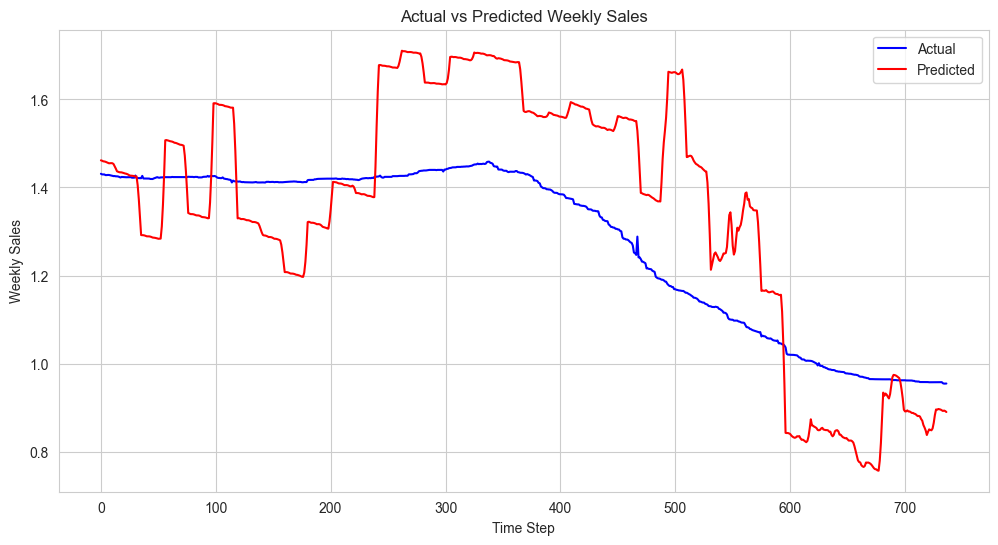

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual.flatten(), label='Actual', color='blue')
plt.plot(y_pred.flatten(), label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Time Step')
plt.ylabel('Weekly Sales')
plt.savefig('Predicted_Sales_2.png', transparent=True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 Score
r2 = r2_score(y_test_actual.flatten(), y_pred.flatten())
print(f"R2 Score: {r2}")


R2 Score: -0.056816080124108215
